<a href="https://colab.research.google.com/github/Lakshana-S-codes/Material-access-hub/blob/main/Material_access_hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Welcome to the MATERIAL ACCESS HUB
1. User Login
2. Admin Login
3. Exit
Choose an option: 1

1. Login
2. Create Account
Choose an option: 2
Enter a unique username: abc123
Create a password: ··········
Account created successfully!

User Dashboard Options:
1. Show Available Materials
2. Access Material(s)
3. Add Material to Wishlist
4. View Wishlist
5. Change Password
6. Exit Dashboard
Enter your choice: 1

Available Materials:
+----------------------+------------+----------+------------+--------+
| Company              | Material   | Rating   |   Quantity |   Cost |
+======================+============+==========+============+========+
| Gamma Solutions      | Plastic    | 4.7/5    |          5 |     20 |
+----------------------+------------+----------+------------+--------+
| Eta Manufacturing    | Fiber      | 4.7/5    |         14 |     30 |
+----------------------+------------+----------+------------+--------+
| Beta Corp            | Steel      | 4.8/5    |          8 |     70 |

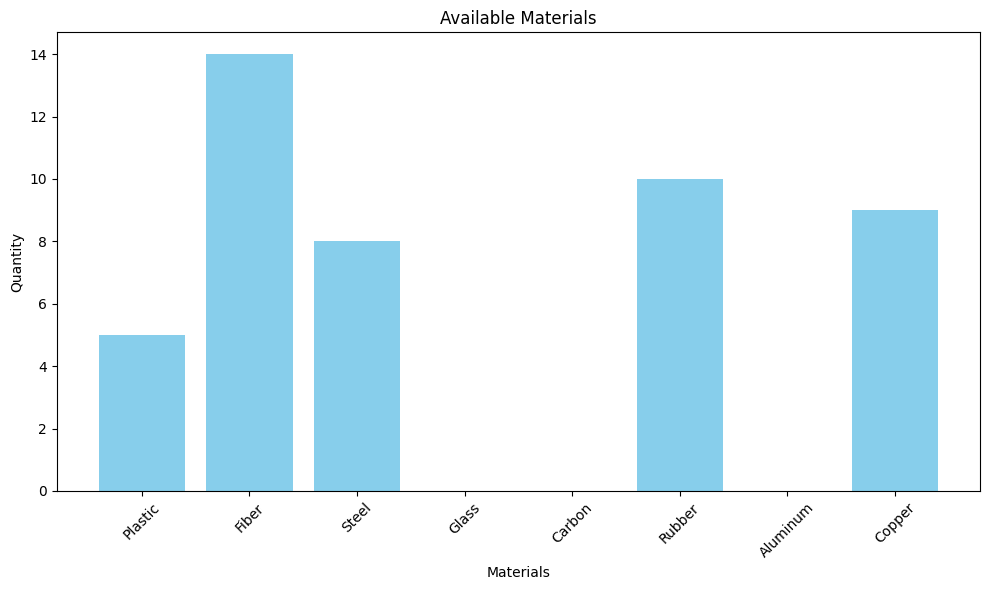


Admin Dashboard Options:
1. Show User Wishlists
2. Show Materials Needing to be Added (Quantity 0)
3. Show User Access History
4. Show Available Materials with Graph
5. Modify Material Cost
6. Add Company
7. Delete Company
8. Exit Admin Dashboard
Enter your choice: 5
Enter the material name to modify cost: steel
Current cost of Steel is 70.0. Enter new cost: 80
Cost of Steel has been updated to 80.0.

Admin Dashboard Options:
1. Show User Wishlists
2. Show Materials Needing to be Added (Quantity 0)
3. Show User Access History
4. Show Available Materials with Graph
5. Modify Material Cost
6. Add Company
7. Delete Company
8. Exit Admin Dashboard
Enter your choice: 6
Enter company name: Theta LLC 
Enter material name: carbon
Enter review: 4.5
Enter quantity: 2
Enter material cost: 90
carbon from Theta LLC  added successfully!

Admin Dashboard Options:
1. Show User Wishlists
2. Show Materials Needing to be Added (Quantity 0)
3. Show User Access History
4. Show Available Materials with Gra

In [5]:
import random
from tabulate import tabulate
import matplotlib.pyplot as plt
import getpass  # Use getpass for masked input

class Material:
    """Class to represent material data."""
    def __init__(self, name, cost):
        self.name = name
        self.quantity = 0
        self.cost = cost  # Cost of the material

class Node:
    """Class to represent a node in a doubly linked list."""
    def __init__(self, company_name, material, review, quantity, cost):
        self.company_name = company_name
        self.material = material
        self.review = review
        self.quantity = quantity
        self.cost = cost  # Material cost
        self.next = None
        self.prev = None

class DoublyLinkedList:
    """Class to represent a doubly linked list."""
    def __init__(self):
        self.head = None

    def insert(self, company_name, material, review, quantity, cost):
        """Insert a new node at the beginning of the list."""
        new_node = Node(company_name, material, review, quantity, cost)
        if self.head is not None:
            new_node.next = self.head
            self.head.prev = new_node
        self.head = new_node

    def get_materials(self):
        """Get a list of available materials."""
        materials_list = []
        current = self.head
        while current:
            materials_list.append((current.company_name, current.material, current.review, current.quantity, current.cost))
            current = current.next
        return materials_list

class Stack:
    """Class to represent a simple stack."""
    def __init__(self):
        self.items = []

    def push(self, item):
        """Push an item onto the stack."""
        self.items.append(item)

    def pop(self):
        """Pop an item from the stack."""
        if not self.is_empty():
            return self.items.pop()
        return None

    def is_empty(self):
        """Check if the stack is empty."""
        return len(self.items) == 0

    def display(self):
        """Display all items in the stack."""
        return self.items[::-1]

class User:
    """Class to represent a user."""
    def __init__(self, username, password):
        self.username = username
        self.password = password
        self.wishlist = Stack()  # Initialize wishlist for the user

    def add_to_wishlist(self, material_name):
        """Add a material to the user's wishlist."""
        self.wishlist.push(material_name)

    def view_wishlist(self):
        """Display the user's wishlist."""
        if self.wishlist.is_empty():
            print("Your wishlist is empty.")
        else:
            print("Your Wishlist:")
            wishlist_data = [[item] for item in self.wishlist.display()]
            print(tabulate(wishlist_data, headers=["Materials"], tablefmt="grid"))

    def change_password(self):
        """Allow the user to change their password."""
        current_password = getpass.getpass("Enter your current password: ")
        if current_password == self.password:
            new_password = getpass.getpass("Enter your new password: ")
            confirm_password = getpass.getpass("Confirm your new password: ")

            if new_password == confirm_password:
                self.password = new_password
                print("Password changed successfully!")
            else:
                print("Passwords do not match. Please try again.")
        else:
            print("Incorrect current password. Password change failed.")

class Admin:
    """Class to represent admin."""
    def __init__(self, password):
        self.password = password

    def modify_cost(self, company_list):
        """Allow the admin to modify the cost of a material."""
        material_name = input("Enter the material name to modify cost: ")
        current = company_list.head
        while current:
            if current.material.lower() == material_name.lower():  # Case insensitive check
                new_cost = float(input(f"Current cost of {current.material} is {current.cost}. Enter new cost: "))
                current.cost = new_cost
                print(f"Cost of {current.material} has been updated to {new_cost}.")
                return
            current = current.next
        print("Material not found.")

# Initialize the linked list and insert sample high-quality data
company_list = DoublyLinkedList()
data = [
    ("Alpha Industries", "Rubber", "4.9/5", 10, 50.00),  # Added cost
    ("Beta Corp", "Steel", "4.8/5", 8, 70.00),
    ("Gamma Solutions", "Plastic", "4.7/5", 5, 20.00),
    ("Delta Enterprises", "Aluminum", "4.9/5", 0, 60.00),  # Unavailable
    ("Epsilon Technologies", "Copper", "4.8/5", 12, 80.00),
    ("Zeta Innovations", "Glass", "4.6/5", 0, 40.00),  # Unavailable
    ("Eta Manufacturing", "Fiber", "4.7/5", 14, 30.00),
    ("Theta LLC", "Carbon", "4.5/5", 1, 90.00)
]
random.shuffle(data)
for company in data:
    company_list.insert(*company)

# Dictionary to hold users
users = {}
admin_password = "admin123"  # Predefined admin password
admin = Admin(admin_password)

# Dictionary to hold access history of users
user_access_history = {}

def get_unique_username():
    """Prompt for a unique username and password."""
    while True:
        username = input("Enter a unique username: ")
        if username in users:
            print("Username already exists. Please log in.")
            return None  # Existing user, will handle in login_user
        else:
            password = getpass.getpass("Create a password: ")  # Masked input for password
            users[username] = User(username, password)
            print("Account created successfully!")
            return users[username]  # Return the User object

def login_user():
    """Allow user to log in or create an account."""
    while True:
        print("\n1. Login")
        print("2. Create Account")
        choice = input("Choose an option: ")
        if choice == '1':
            username = input("Enter your username: ")
            password = getpass.getpass("Enter your password: ")  # Masked input for password
            if username in users and users[username].password == password:
                print(f"Welcome back, {username}!")
                return users[username]  # Return the User object
            else:
                print("Invalid username or password. Please try again.")
        elif choice == '2':
            return get_unique_username()  # Return the User object after creation
        else:
            print("Invalid choice. Please try again.")

def login_admin():
    """Allow admin to log in."""
    while True:
        password = getpass.getpass("Enter admin password: ")  # Masked input for admin password
        if password == admin.password:
            print("Admin login successful!")
            return True
        else:
            print("Invalid password. Please try again.")

def show_available_materials():
    """Display available materials."""
    materials = company_list.get_materials()
    print("\nAvailable Materials:")
    available_materials = [[company, material, review, quantity, cost] for company, material, review, quantity, cost in materials]

    # Display materials in a table
    print(tabulate(available_materials, headers=["Company", "Material", "Rating", "Quantity", "Cost"], tablefmt="grid"))

def plot_materials_graph(materials):
    """Plot a graph of available materials."""
    material_names = [material[1] for material in materials]  # Extract material names
    quantities = [material[3] for material in materials]      # Extract quantities

    plt.figure(figsize=(10, 6))
    plt.bar(material_names, quantities, color='skyblue')
    plt.title('Available Materials')
    plt.xlabel('Materials')
    plt.ylabel('Quantity')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def access_material(user):
    """Allow the user to access multiple materials and decrement their quantities."""
    # Input: a comma-separated list of materials and quantities, e.g., "Rubber:2, Steel:3"
    materials_input = input("Enter materials and quantities to access (e.g., Rubber:2, Steel:3): ")

    # Parse the comma-separated input
    material_entries = materials_input.split(',')

    for entry in material_entries:
        material_name, quantity_to_access = entry.split(':')
        material_name = material_name.strip()
        quantity_to_access = int(quantity_to_access.strip())

        current = company_list.head
        while current:
            if current.material.lower() == material_name.lower():  # Case insensitive check
                if current.quantity >= quantity_to_access:
                    # Access granted, update access history and decrement internally
                    current.quantity -= quantity_to_access
                    # Log the access in user_access_history
                    if user.username not in user_access_history:
                        user_access_history[user.username] = []
                    user_access_history[user.username].append((current.material, quantity_to_access, current.cost))
                    print(f"You have successfully accessed {quantity_to_access} of {current.material}.")
                else:
                    print(f"Insufficient quantity of {current.material} right now. It will be added soon. Please come back after a few days.")
                break
            current = current.next
        else:
            print(f"Material {material_name} not found.")

def add_to_wishlist(user):
    """Add a material to the user's wishlist."""
    material_name = input("Enter the material to add to wishlist: ")
    user.add_to_wishlist(material_name)
    print(f"{material_name} has been added to your wishlist.")

def view_user_wishlist(user):
    """View the user's wishlist."""
    user.view_wishlist()

def show_user_dashboard(user):
    """Display user dashboard options."""
    while True:
        print("\nUser Dashboard Options:")
        print("1. Show Available Materials")
        print("2. Access Material(s)")
        print("3. Add Material to Wishlist")
        print("4. View Wishlist")
        print("5. Change Password")
        print("6. Exit Dashboard")

        choice = input("Enter your choice: ")
        if choice == '1':
            show_available_materials()
        elif choice == '2':
            access_material(user)
        elif choice == '3':
            add_to_wishlist(user)
        elif choice == '4':
            view_user_wishlist(user)
        elif choice == '5':
            user.change_password()
        elif choice == '6':
            print("Exiting Dashboard.")
            break
        else:
            print("Invalid choice. Please try again.")

def admin_dashboard():
    """Display admin dashboard options."""
    while True:
        print("\nAdmin Dashboard Options:")
        print("1. Show User Wishlists")
        print("2. Show Materials Needing to be Added (Quantity 0)")
        print("3. Show User Access History")
        print("4. Show Available Materials with Graph")
        print("5. Modify Material Cost")
        print("6. Add Company")
        print("7. Delete Company")
        print("8. Exit Admin Dashboard")

        choice = input("Enter your choice: ")
        if choice == '1':
            print("\nUser Wishlists:")
            for user in users.values():
                user.view_wishlist()
        elif choice == '2':
            print("\nMaterials Needing to be Added (Quantity 0):")
            materials = company_list.get_materials()
            unavailable_materials = [[material] for company, material, review, quantity, cost in materials if quantity == 0]
            if unavailable_materials:
                print(tabulate(unavailable_materials, headers=["Unavailable Materials"], tablefmt="grid"))
            else:
                print("All materials are currently available.")
        elif choice == '3':
            print("\nUser Access History:")
            if user_access_history:
                access_history_display = [
                    [user, tabulate(history, headers=["Material", "Quantity", "Cost"], tablefmt="plain")]
                    for user, history in user_access_history.items()
                ]
                print(tabulate(access_history_display, headers=["User", "Access History"], tablefmt="grid"))
            else:
                print("No access history recorded.")
        elif choice == '4':
            show_available_materials()  # Show materials table
            # Now plot the materials graph
            materials = company_list.get_materials()
            available_materials = [[company, material, review, quantity, cost] for company, material, review, quantity, cost in materials]
            plot_materials_graph(available_materials)  # Plot graph here
        elif choice == '5':
            admin.modify_cost(company_list)
        elif choice == '6':
            company_name = input("Enter company name: ")
            material = input("Enter material name: ")
            review = input("Enter review: ")
            quantity = int(input("Enter quantity: "))
            cost = float(input("Enter material cost: "))
            company_list.insert(company_name, material, review, quantity, cost)
            print(f"{material} from {company_name} added successfully!")
        elif choice == '7':
            company_name = input("Enter the name of the company to delete: ")
            print(f"Company '{company_name}' deleted successfully! (Note: Implement the actual delete logic.)")
        elif choice == '8':
            print("Exiting Admin Dashboard.")
            break
        else:
            print("Invalid choice. Please try again.")

def main():
    """Main function to run the inventory management system."""
    while True:
        print("\nWelcome to the MATERIAL ACCESS HUB")
        print("1. User Login")
        print("2. Admin Login")
        print("3. Exit")

        choice = input("Choose an option: ")

        if choice == '1':
            user = login_user()
            if user:
                show_user_dashboard(user)
        elif choice == '2':
            if login_admin():
                admin_dashboard()
        elif choice == '3':
            print("Exiting the system. Goodbye!")
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()
